### **Análisis Exploratorio de Datos**

- Importamos las librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Leemos el archivo

In [2]:
df = pd.read_csv('refugiados_pais_asilo.csv')

- Analizamos los primeros y últimos registros.

In [3]:
df.head()

,Año,Pais,Id_Pais,Poblacion_pais_asilo
0,2001,Afghanistan,AFG,10
1,2003,Afghanistan,AFG,24
2,2004,Afghanistan,AFG,31
3,2005,Afghanistan,AFG,31
4,2006,Afghanistan,AFG,34


In [4]:
df.tail()

,Año,Pais,Id_Pais,Poblacion_pais_asilo
3269,2016,Zimbabwe,ZWE,7423
3270,2017,Zimbabwe,ZWE,7566
3271,2018,Zimbabwe,ZWE,7795
3272,2019,Zimbabwe,ZWE,8956
3273,2020,Zimbabwe,ZWE,9261


- Rellenamos con 0 si hay valores nulos.

In [5]:
df = df.fillna(0)

- Verificamos la estructura del dataframe.

In [6]:
df.shape

(3274, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3274 entries, 0 to 3273
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Año                   3274 non-null   int64 
 1   Pais                  3274 non-null   object
 2   Id_Pais               3274 non-null   object
 3   Poblacion_pais_asilo  3274 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 102.4+ KB


- Realizamos estadísticas descriptivas.

In [8]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,Año,Poblacion_pais_asilo
count,3274.00,3274.00
mean,2010.29,103143.66
std,6.04,322277.23
min,2000.00,5.00
25%,2005.00,569.00
50%,2010.00,5585.00
75%,2016.00,55040.75
max,2020.00,3681688.00


- Filtramos el año 2020 para ver cuales son los 10 paises de asilo con mayor cantidad de refugiados.

In [9]:
año = 2020
top_paises_año = df[df['Año'] == año].sort_values(by=['Poblacion_pais_asilo'], ascending=False)

top_paises = top_paises_año.head(10)
top_paises[['Pais', 'Poblacion_pais_asilo']]


,Pais,Poblacion_pais_asilo
2998,Turkey,3652362
1553,Jordan,3009472
2275,Pakistan,1438940
3048,Uganda,1421133
1679,Lebanon,1349925
1148,Germany,1210596
2791,Sudan,1040288
234,Bangladesh,866534
1015,Ethiopia,800454
1415,Iran,800025


### **Visualizaciones**

- Realizamos gráficos de barras por intervalos de 5 años para ver la distribución en los 10 paises de asilo que más refugiados reciben a lo largo de los años.

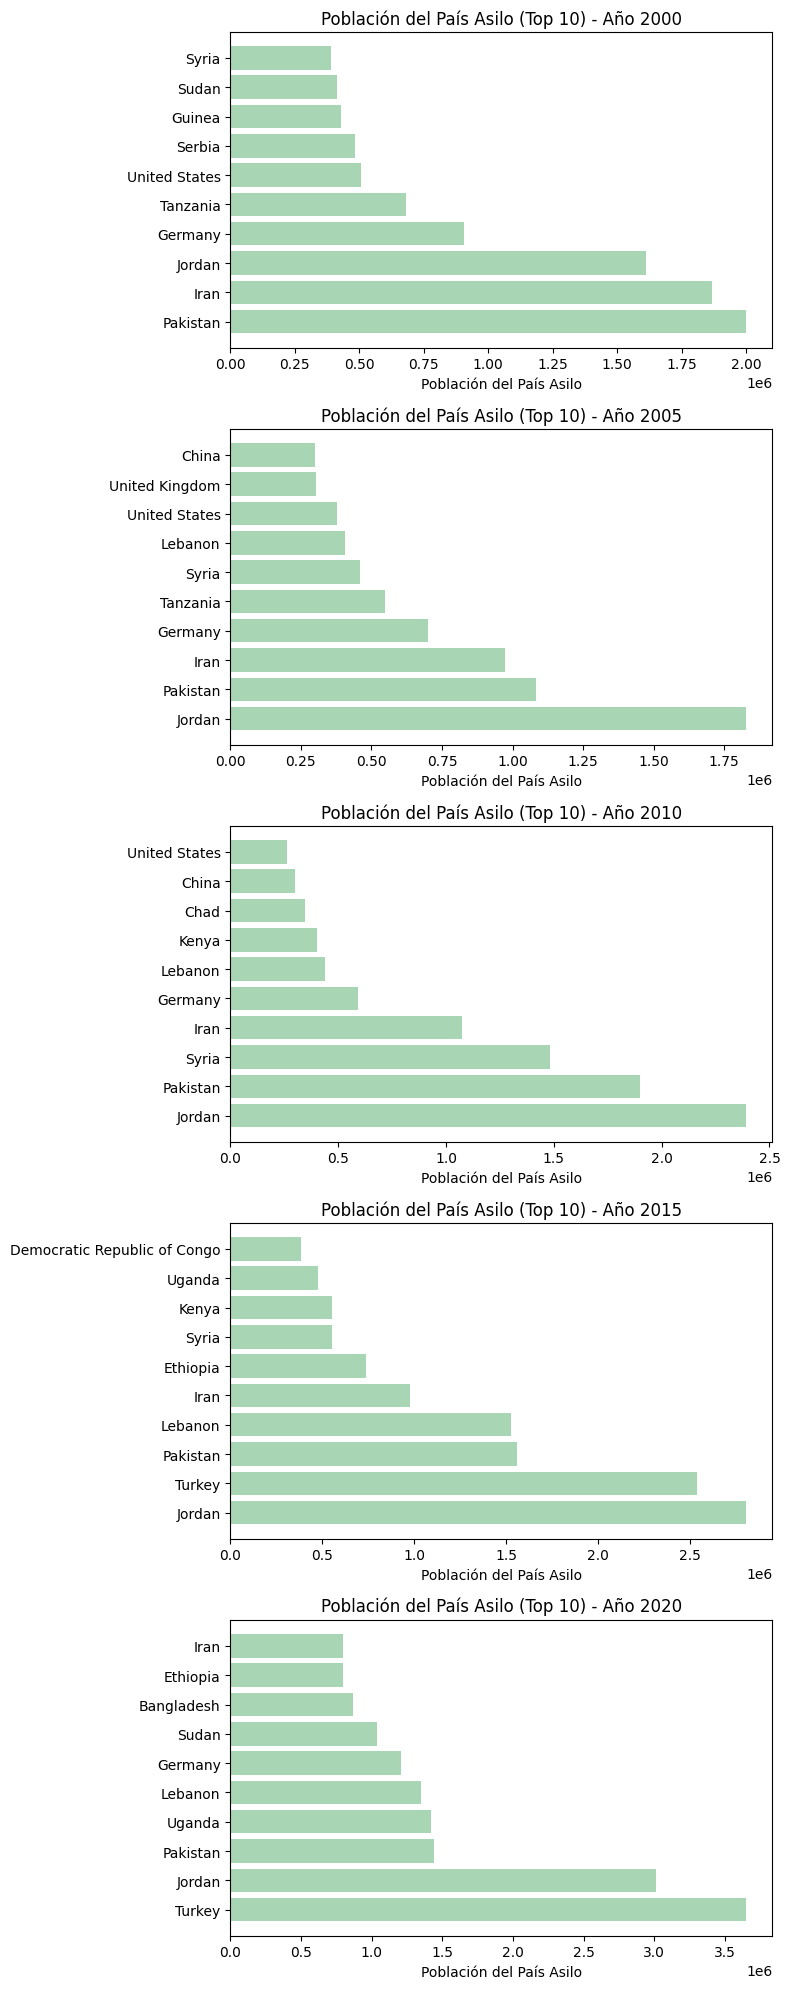

In [10]:
años_seleccionados = [2000, 2005, 2010, 2015, 2020]

fig, axes = plt.subplots(len(años_seleccionados), 1, figsize=(8, 4 * len(años_seleccionados)))
plt.subplots_adjust(hspace=0.5)
green_light_color = '#A8D6B4'

for i, año in enumerate(años_seleccionados):
    
    df_año = df[df['Año'] == año]
    
    top_10 = df_año.nlargest(10, 'Poblacion_pais_asilo')
    
    ax = axes[i]
    y = np.arange(len(top_10))
    ax.barh(y, top_10['Poblacion_pais_asilo'], color=green_light_color)
    ax.set_yticks(y)
    ax.set_yticklabels(top_10['Pais'])
    ax.set_xlabel('Población del País Asilo')
    ax.set_title(f'Población del País Asilo (Top 10) - Año {año}')

plt.tight_layout()
plt.show()

### **Conclusión**

Estos análisis revelan la constante evolución de los flujos migratorios hacia países de asilo. A lo largo del tiempo, ciertas naciones han mantenido un aumento sostenido en la población de refugiados, consolidando su reputación como destinos seguros y hospitalarios. Al mismo tiempo, otras regiones han emergido como nuevos puntos de llegada para migrantes en busca de protección, en respuesta a los cambiantes desafíos globales.